In [8]:
# primeiro monte o google drive

!ls /content/drive/MyDrive/Projetos/Achilles/Achilles_3D/Análise\ de\ Incertezas/Resultados\ do\ Achilles1D\ para\ os\ poços

'COMBO Achilles 1D poços BES.ipynb'
 ESS-120
 ESS-131
 ESS-138
 ESS-151
 ESS-167
 ESS-174A
 ESS-186
 ESS-86A
 ESS-94
'Metodologias utilizadas para obtenção das variaveis de input.pptx'


In [57]:
base = '/content/drive/MyDrive/Projetos/Achilles/Achilles_3D/Análise de Incertezas/Resultados do Achilles1D para os poços/'
pocos = ['ESS-120','ESS-131','ESS-138','ESS-151','ESS-167','ESS-174A','ESS-186','ESS-86A','ESS-94']

mywell = pocos[6]

import pandas as pd


for ii,mywell in enumerate(pocos):

    if (mywell=='ESS-94') | (mywell=='ESS-138'):
        colspecs=[(0,7),(7,None)]
    else:
        colspecs=[(0, 6), (6, None)]
    
    df_dbd = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Densidade aparente seca.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_dbd.columns=['Prof','dbd']

    df_sandfrac = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Fração de areia.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_sandfrac.columns=['Prof','sandfrac']

    df_idade = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Idades.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_idade.columns=['Prof','age']

    df_paleobat = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Paleobatimetria.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_paleobat.columns=['Prof','paleobat']

    df_pp = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Produtividade primária.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_pp.columns=['Prof','pp']

    df_sedrat = pd.read_fwf(base + mywell + '/Dados de entrada/txt/' + 'Taxa de sedimentação.txt',
                     colspecs=colspecs,header=None,skiprows=1)
    df_sedrat.columns=['Prof','sedrat']

    df = pd.concat([df_idade,df_dbd.dbd,df_sedrat.sedrat,df_pp.pp,df_paleobat.paleobat,df_sandfrac.sandfrac],axis=1)
    df = df.assign(wellname=mywell)[['wellname'] + df.columns.tolist()]

    if ii==0:
        df_data = df
    else:
        df_data = pd.concat([df_data,df],axis=0)

In [58]:
df_data[df_data.wellname=='ESS-138']

,wellname,Prof,age,dbd,sedrat,pp,paleobat,sandfrac
0,ESS-138,2424.99,48.564186,NaN,NaN,148.178997,991.380319,95.471050
1,ESS-138,2425.19,48.566353,NaN,7.469479,148.178500,991.389321,95.443490
2,ESS-138,2425.39,48.569031,NaN,7.469482,148.177886,991.400442,95.169939
3,ESS-138,2425.59,48.571708,NaN,7.469479,148.177273,991.411563,95.321935
4,ESS-138,2425.79,48.574386,NaN,7.469475,148.176659,991.422684,95.699907
...,...,...,...,...,...,...,...,...
15806,ESS-138,5586.19,92.694492,NaN,9.077913,NaN,NaN,65.122104
15807,ESS-138,5586.39,92.694492,NaN,9.077913,NaN,NaN,65.122104
15808,ESS-138,5586.59,92.694492,NaN,9.077913,NaN,NaN,65.122104
15809,ESS-138,5586.79,92.694492,NaN,9.077913,NaN,NaN,65.122104


In [59]:
df_data.to_excel('Poços_BES.xlsx')

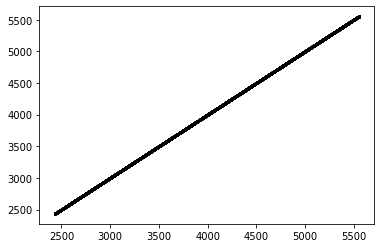

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df_dbd.Prof,df_sedrat.Prof,s=2,c='k',marker='o')